In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import xlrd
import geopandas as gpd

In [2]:
RESOURCE_MAX = .5
INDICATORS = {
    'overall':{
        'crit':{
            'antimony':  {'vmax':RESOURCE_MAX},
            'beryllium': {'vmax':RESOURCE_MAX},
            'bismuth':   {'vmax':RESOURCE_MAX},
            'cadmium':   {'vmax':RESOURCE_MAX},
            'chromium':  {'vmax':RESOURCE_MAX},
            'cobalt':    {'vmax':RESOURCE_MAX},
            'graphite':  {'vmax':RESOURCE_MAX},
            'lithium':   {'vmax':RESOURCE_MAX},
            'magnesium': {'vmax':RESOURCE_MAX},
            'manganese': {'vmax':RESOURCE_MAX},
            'molybdenum':{'vmax':RESOURCE_MAX},
            'niobium':   {'vmax':RESOURCE_MAX},
            'palladium': {'vmax':RESOURCE_MAX},
            'platinum':  {'vmax':RESOURCE_MAX},
            'ree':       {'vmax':RESOURCE_MAX},
            'rhodium':   {'vmax':RESOURCE_MAX},
            'titanium':  {'vmax':RESOURCE_MAX},
            'tungsten':  {'vmax':RESOURCE_MAX},
            'uranium':   {'vmax':RESOURCE_MAX},
            'zirconium': {'vmax':RESOURCE_MAX},
        },
        'metals':{
            'aluminum':  {'vmax':RESOURCE_MAX},
            'copper':    {'vmax':RESOURCE_MAX},
            'gold':      {'vmax':RESOURCE_MAX},
            'silver':    {'vmax':RESOURCE_MAX},
            'nickel':    {'vmax':RESOURCE_MAX},
            'zinc':      {'vmax':RESOURCE_MAX},
            'lead':      {'vmax':RESOURCE_MAX},
            'steel':     {'vmax':RESOURCE_MAX},
            'tin':       {'vmax':RESOURCE_MAX},
        },
        'ag':{
            'coffee':    {'vmax':RESOURCE_MAX},
            'maize':     {'vmax':RESOURCE_MAX},
            'milk':      {'vmax':RESOURCE_MAX},
            'palm':      {'vmax':RESOURCE_MAX},
            'pork':      {'vmax':RESOURCE_MAX},
            'poultry':   {'vmax':RESOURCE_MAX},
            'rice':      {'vmax':RESOURCE_MAX},
            'soy':       {'vmax':RESOURCE_MAX},
            'sugar':     {'vmax':RESOURCE_MAX},
            'wheat':     {'vmax':RESOURCE_MAX},
            'beef':      {'vmax':RESOURCE_MAX},
        },
        'energy':{
            'gas':       {'vmax':RESOURCE_MAX},
            'oil':       {'vmax':RESOURCE_MAX},
            'coal':      {'vmax':RESOURCE_MAX},
        },
        'mil_ex': {'log':True, 'winsor':2.5},
        'arms': {
             'arms_ex': {'vmax':.5},
             'arms_im': {'vmax':.2},
        },
        'unga': {},
        'aid': {'vmax':.1},
        'trade':{'log':True, 'winsor':2.5},
        'fdi':{'log':True, 'winsor':2.5},
        'students':{
            'student_in':{'log':True, 'winsor':2.5},
            'student_out':{'log':True, 'winsor':2.5},
        }
    },
    'resources':{
        'crit',
        'metals',
        'ag',
        'energy',
    },
    'mil':{
        'arms',
        'mil_ex',
    },
    'diplo':{
        'unga',
        'aid',
    },
    'soft':{
        'trade',
        'fdi',
        'students'
    }
}
def iterind(f, indicators=None, **kwargs):
    if indicators is None:
        indicators = INDICATORS
    for k,v in indicators.items():
        if (type(v) is dict and len(v) and not ('vmin' in v or 'vmax' in v or 'log' in v)):
            iterind(f, v, **kwargs)
        f(k, v, **kwargs)

In [3]:
countries = pd.read_csv('countries.csv')
countries = countries.set_index('iso_a3').drop('-99')
#shps = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
shps = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip')
shps.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((33.90371119710453 -0.950000000000000...
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,POLYGON ((-8.665589565454809 27.65642588959236...
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [4]:
dat = pd.read_csv('all_ind2.csv')
dat.set_index('iso', inplace=True)
dat['fdi_us'].loc[dat['fdi_us']==0] = np.nan
dat['fdi_cn'].loc[dat['fdi_cn']==0] = np.nan
dat['country'] = countries['name']
dat = dat[countries['primary']>0]
us_col = [c for c in dat if c[-2:]=='us']
cn_col = [c for c in dat if c[-2:]=='cn']
dat.at['USA', us_col] = np.nan
dat.at['CHN', cn_col] = np.nan
dat.loc[['USA', 'CHN']]


/usr/local/homebrew/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,country,aluminum_us,aluminum_cn,antimony_us,antimony_cn,beryllium_us,beryllium_cn,bismuth_us,bismuth_cn,cadmium_us,...,aid_us,aid_cn,unga_us,unga_cn,arms_ex_us,arms_im_us,arms_ex_cn,arms_im_cn,mil_ex_us,mil_ex_cn
iso,,,,,,,,,,,,,,,,,,,,,
USA,United States of America,NaN,0.0,NaN,0.001,NaN,0.051,NaN,0.002,NaN,...,NaN,0.0,NaN,0.18,NaN,NaN,0.0,0.0,NaN,23.0
CHN,China,0.001,NaN,0.524,NaN,0.0,NaN,0.752,NaN,0.046,...,0.0,NaN,0.18,NaN,0.0,0.0,NaN,NaN,7.0,NaN


In [5]:
def norm(seq, vmin=None, vmax=None, log=False, winsor=False):
    if log:
        seq = seq+1
    if not vmin:
        if winsor:
            vmin = np.nanpercentile(seq, winsor)
        else:
            vmin = np.min(seq)
    if not vmax:
        if winsor:
            vmax = np.nanpercentile(seq, 100-winsor)
        else:
            vmax = np.max(seq)
    if log:
        seq = np.log(seq)
        vmin = np.log(vmin)
        vmax = np.log(vmax)
    s = (seq - vmin)/(vmax - vmin)
    s = np.clip(s, 0, 1)
    return s

In [6]:
out = pd.DataFrame(index=dat.index)
out['country'] = dat['country']

def agg(ind, args, df=out, max_resources=False):
    usi = '{}_us'.format(ind)
    cni = '{}_cn'.format(ind)
    if args == {} or 'vmin' in args or 'vmax' in args or 'log' in args:
        if usi in dat:
            if not 'vmax' in args:
                if 'winsor' in args:
                    args['vmax'] = np.nanpercentile(np.vstack((dat[usi], dat[cni])), 100-args['winsor'])
                else:
                    args['vmax'] = np.nanmax(np.vstack((dat[usi], dat[cni])))
            df[usi] = norm(dat[usi], **args)
            df.at['USA', usi] = np.nan
            df[cni] = norm(dat[cni], **args)
            df.at['CHN', cni] = np.nan
    else:
        usargs = ['{}_us'.format(arg) for arg in args]
        cnargs = ['{}_cn'.format(arg) for arg in args]
        df[usi] = np.nanmean(df[usargs], axis=1)
        df[cni] = np.nanmean(df[cnargs], axis=1)
        vmax = np.nanmax(np.vstack((df[usi], df[cni])))
        df[usi] = df[usi]/vmax
        df[cni] = df[cni]/vmax

out2 = out.copy()
iterind(agg, df=out)

out.head()

/usr/local/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/usr/local/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


,country,antimony_us,antimony_cn,beryllium_us,beryllium_cn,bismuth_us,bismuth_cn,cadmium_us,cadmium_cn,chromium_us,...,overall_us,overall_cn,resources_us,resources_cn,mil_us,mil_cn,diplo_us,diplo_cn,soft_us,soft_cn
iso,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.345749,0.164688,0.000000,0.000000,0.313333,0.000000,0.626667,0.493769,0.406432,0.139877
ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006,...,0.246478,0.113487,0.000519,0.006577,0.351573,0.000000,0.297954,0.244251,0.310116,0.184500
DZA,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.197985,0.271137,0.008066,0.005378,0.242638,0.120000,0.065215,0.480870,0.441585,0.360729
AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.212689,0.396744,0.024199,0.209727,0.203255,0.207742,0.063762,0.544070,0.513550,0.429960
ARG,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.422065,0.301803,0.068328,0.074987,0.536588,0.000000,0.151881,0.453239,0.667484,0.475843


/usr/local/homebrew/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/usr/local/homebrew/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


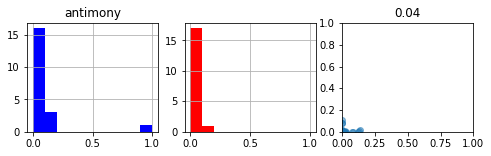

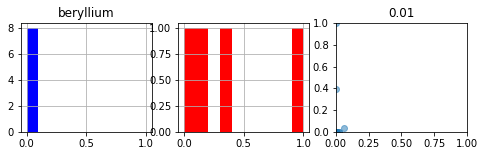

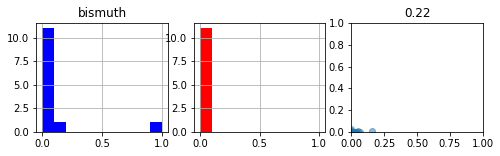

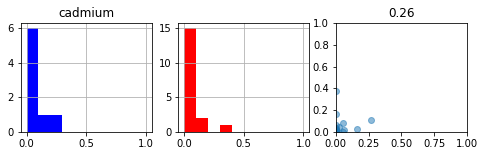

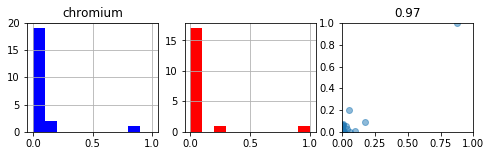

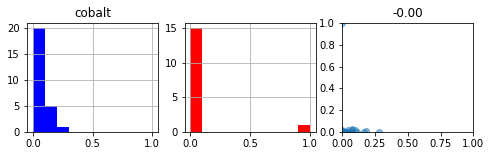

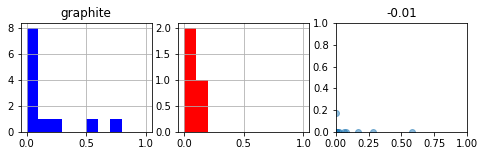

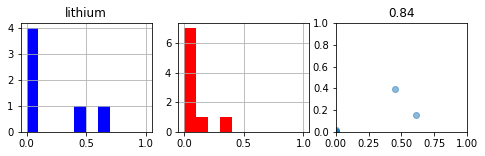

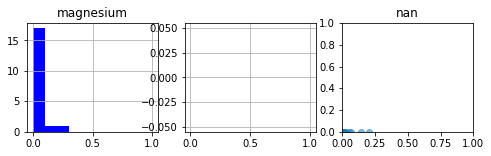

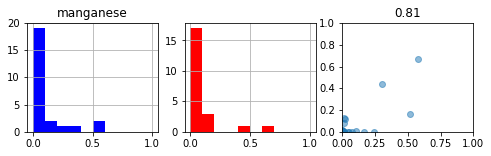

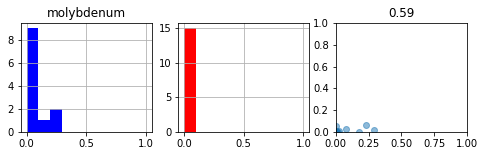

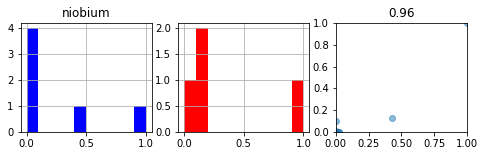

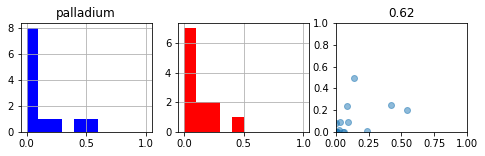

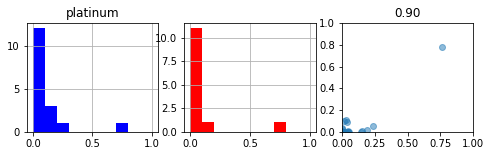

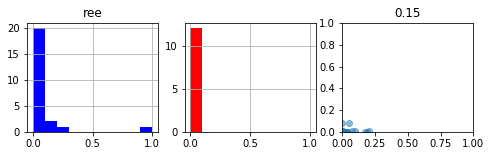

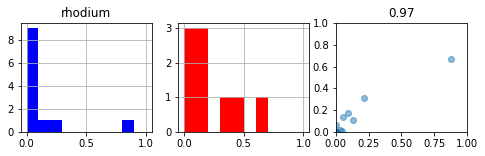

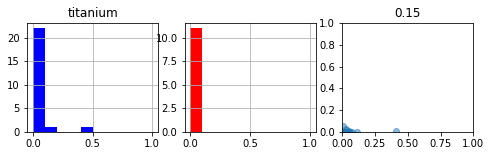

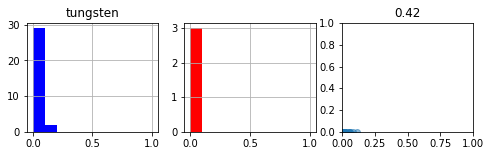

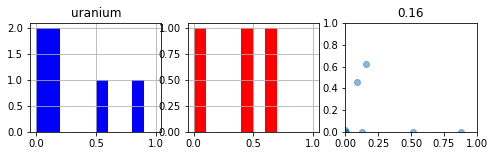

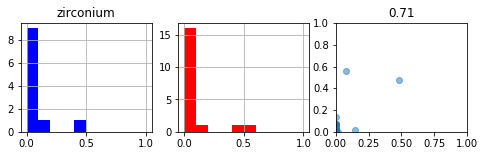

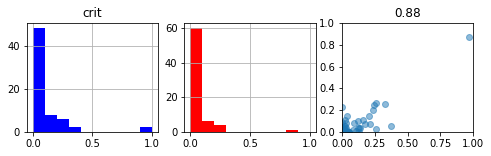

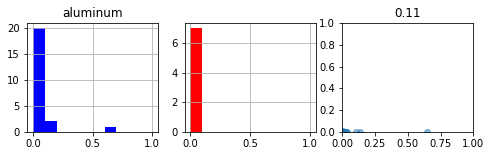

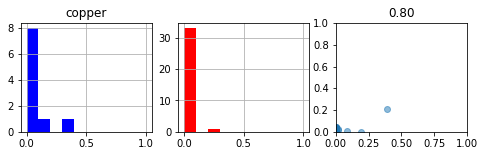

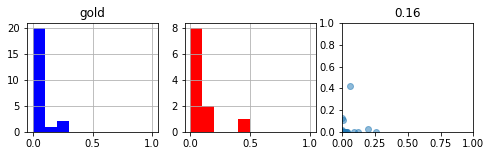

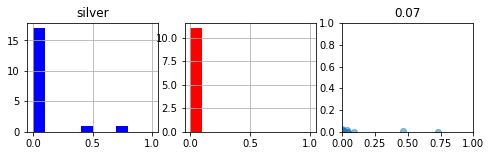

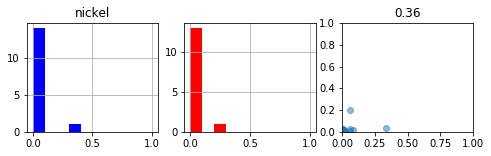

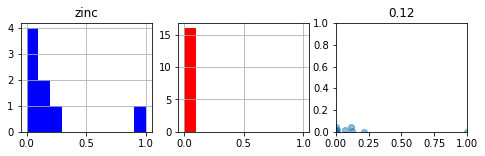

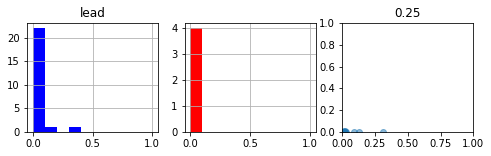

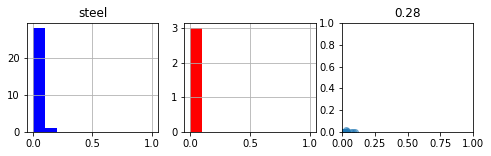

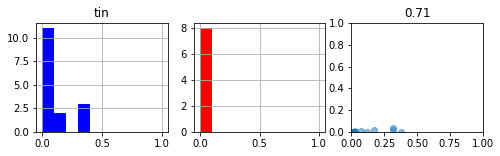

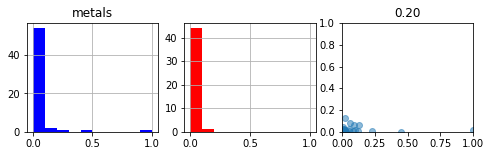

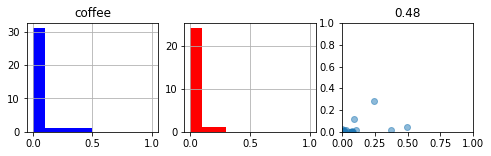

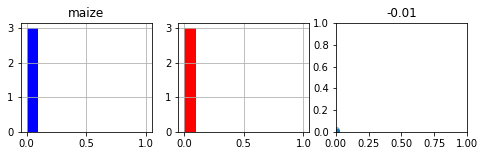

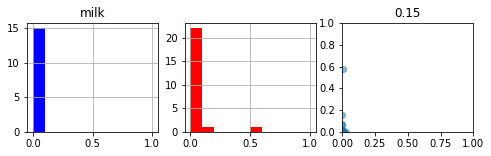

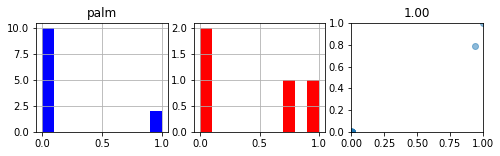

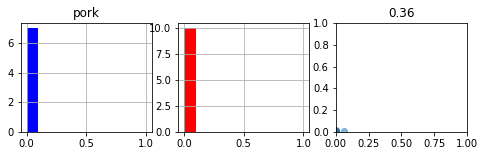

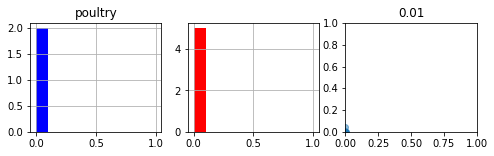

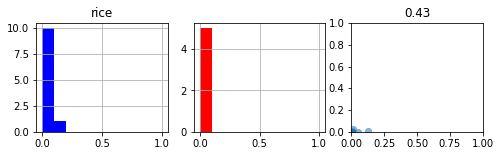

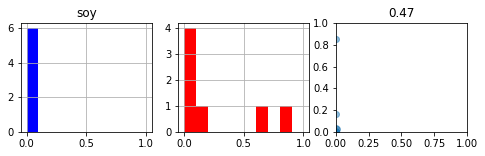

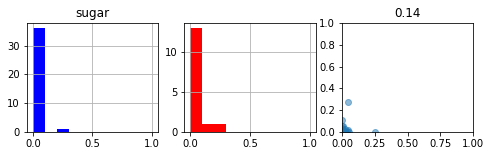

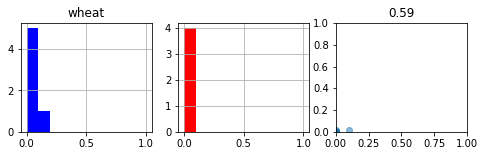

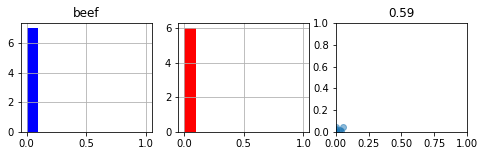

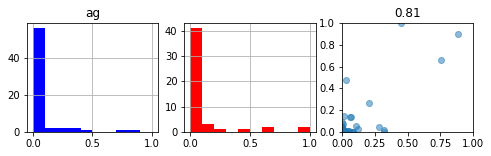

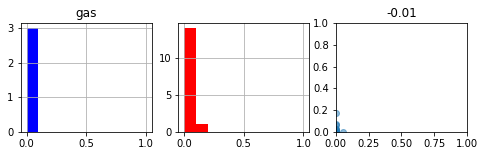

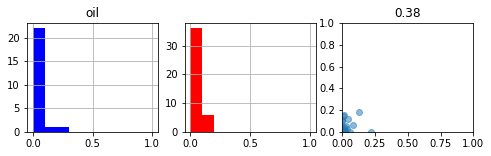

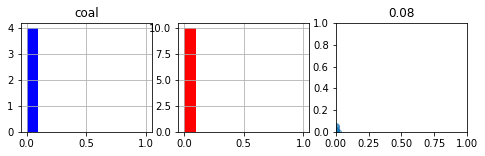

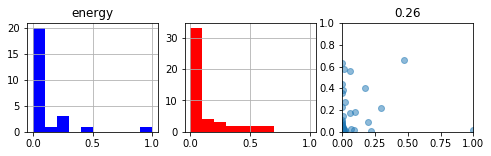

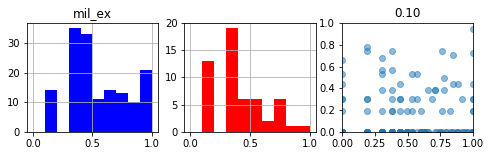

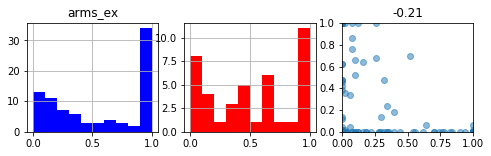

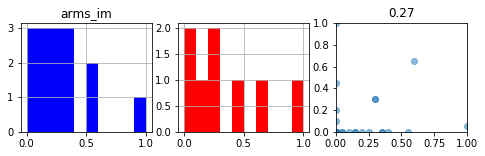

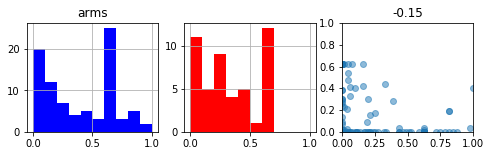

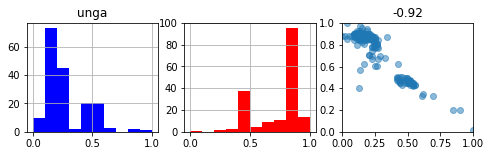

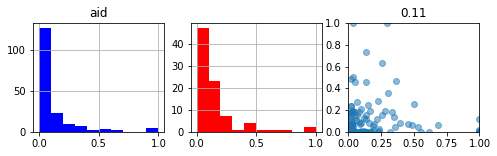

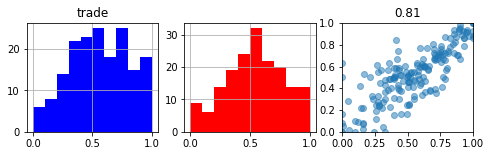

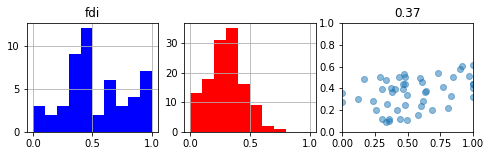

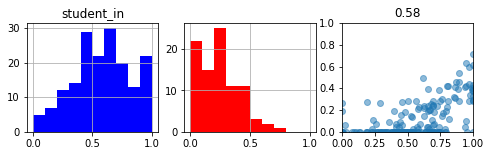

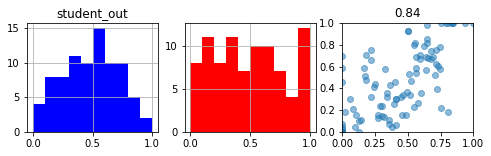

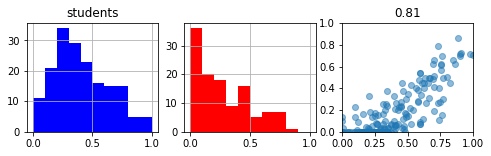

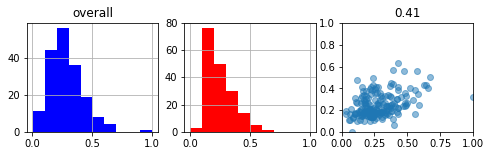

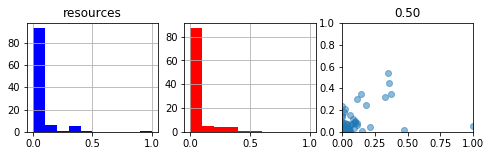

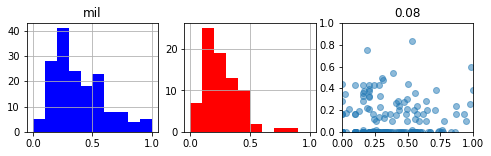

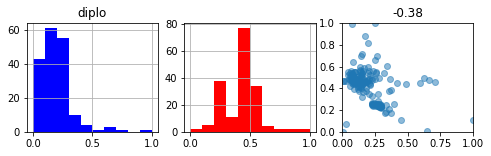

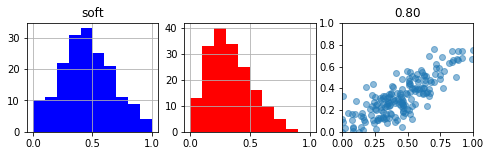

In [7]:
def plots(ind, *args, dat=dat, vmax=None, skipzeros=False):
    usi = '{}_us'.format(ind)
    cni = '{}_cn'.format(ind)
    if usi in dat:
        x = dat[usi].copy()
        y = dat[cni].copy()
        both = np.vstack((x,y))
        vmin = np.nanmin(both)
        if not vmax:
            vmax = np.nanmax(both)
        if skipzeros:
            x.loc[x==0] = np.nan
            y.loc[y==0] = np.nan
        fig, axs = plt.subplots(1, 3, figsize=(8, 2))
        x.hist(ax=axs[0], color='b', range=(vmin, vmax))
        y.hist(ax=axs[1], color='r', range=(vmin, vmax))
        axs[2].scatter(dat[usi], dat[cni], alpha=.5)
        axs[2].set_xlim((vmin, vmax))
        axs[2].set_ylim((vmin, vmax))
        axs[0].set_title(ind)
        axs[2].set_title("{:0.2f}".format(dat[[usi,cni]].corr().iloc[1,0]))
        fig.show()
iterind(plots, dat=out, vmax=1, skipzeros=True)

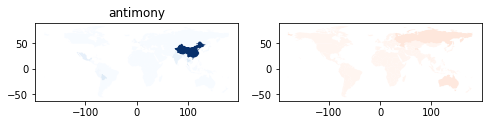

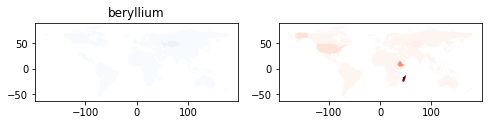

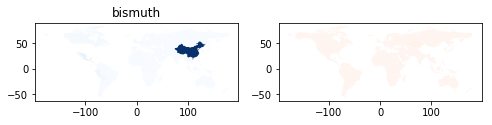

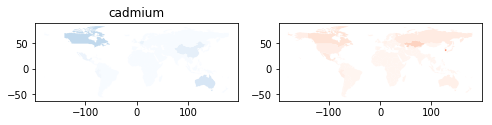

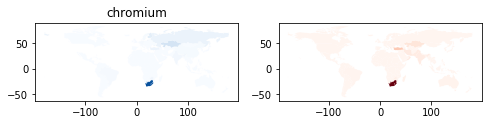

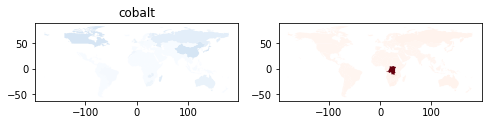

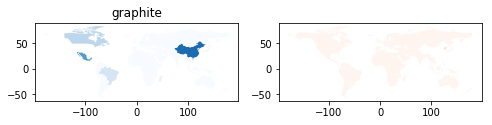

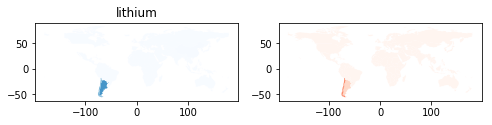

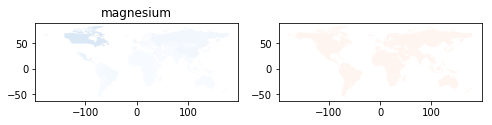

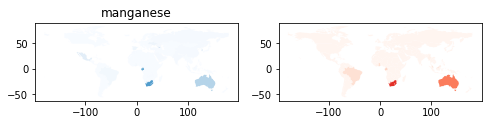

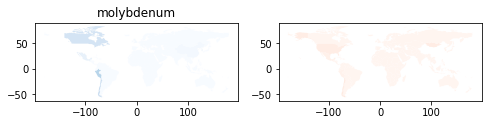

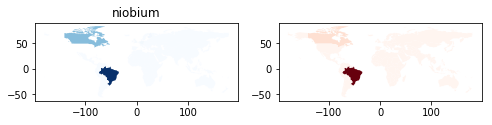

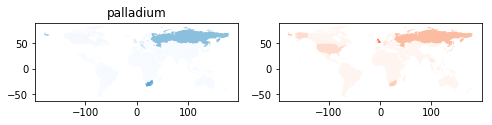

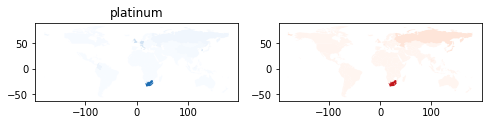

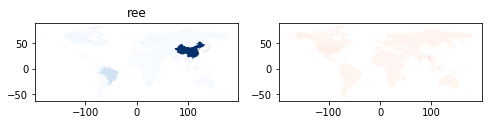

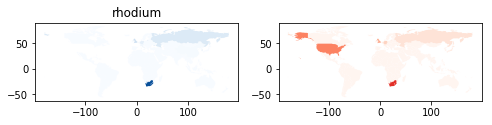

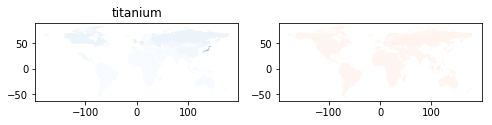

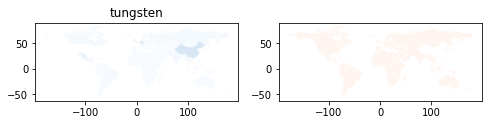

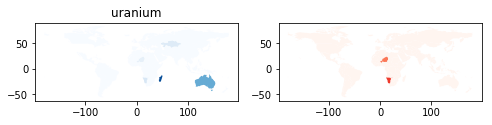

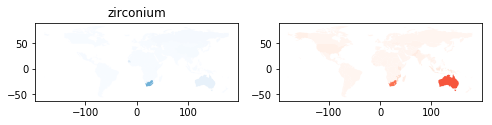

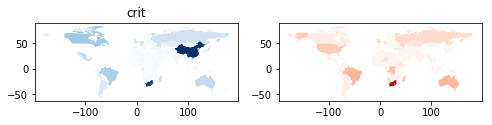

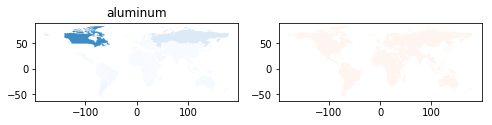

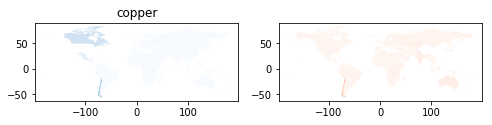

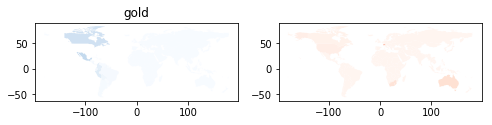

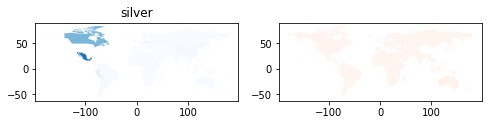

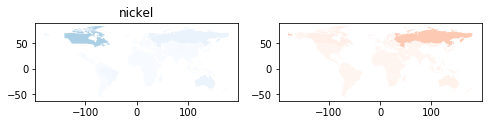

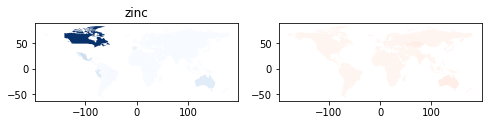

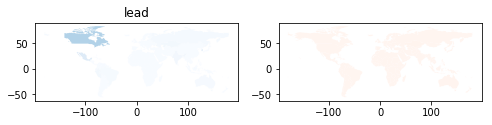

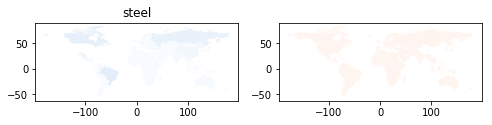

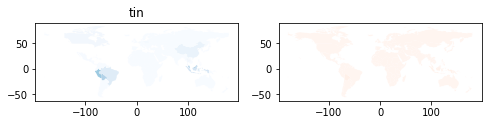

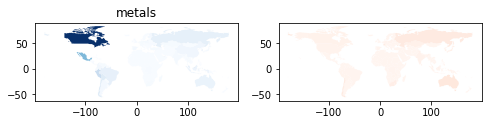

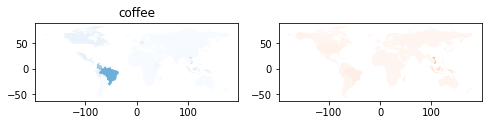

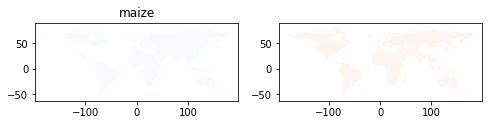

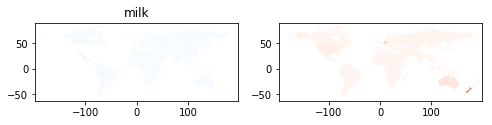

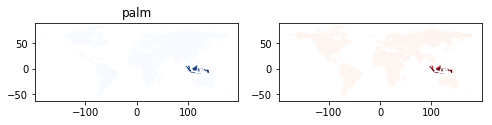

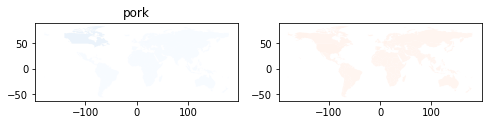

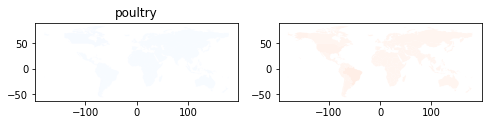

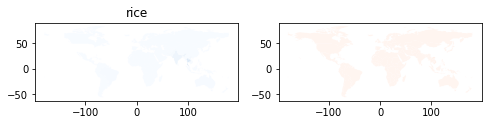

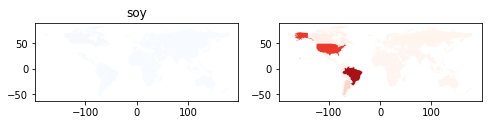

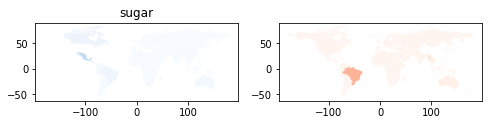

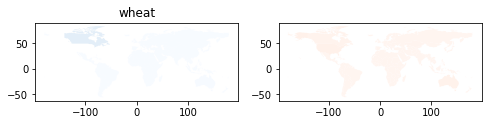

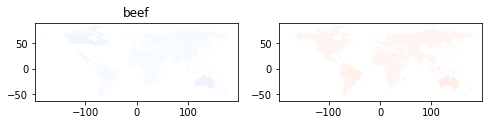

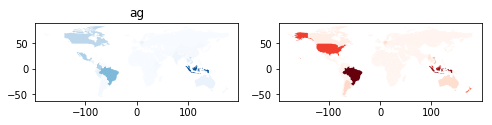

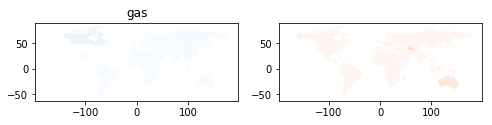

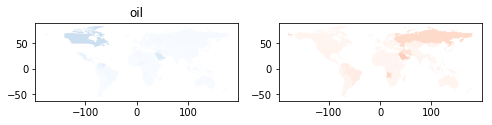

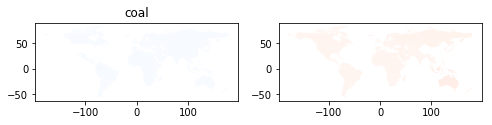

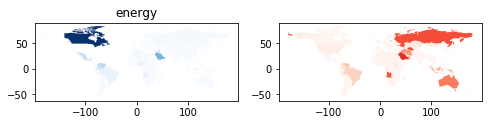

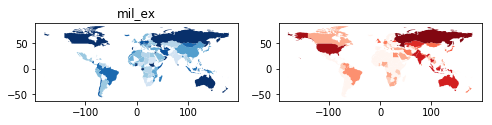

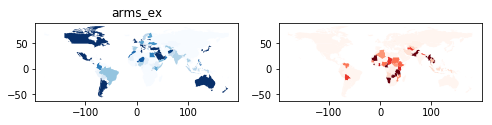

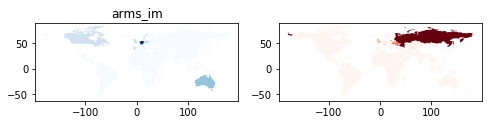

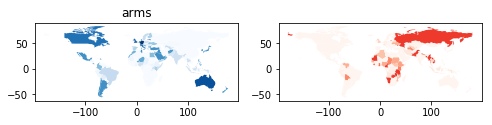

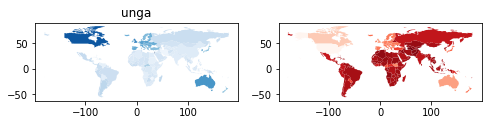

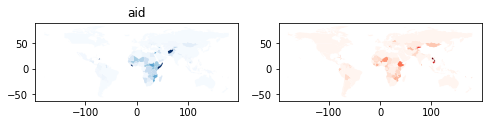

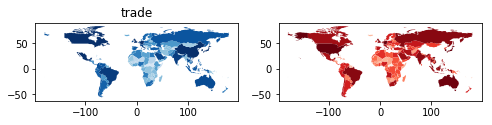

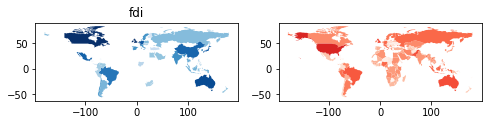

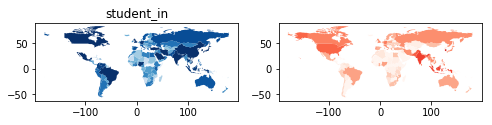

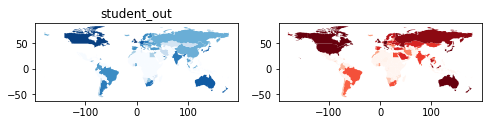

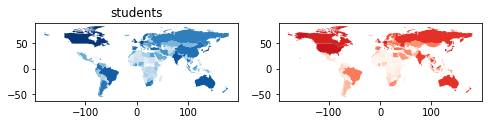

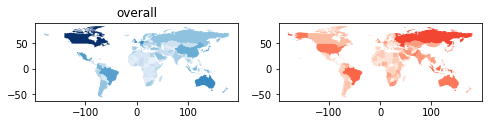

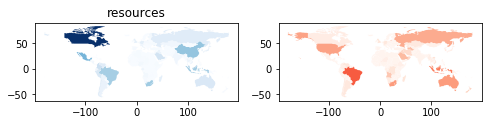

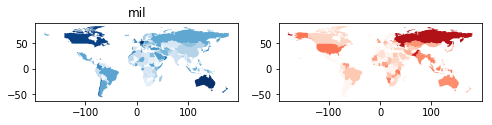

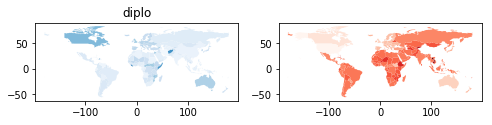

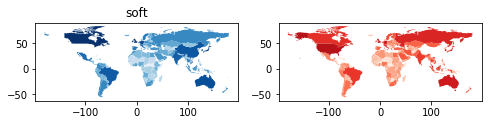

In [8]:
def maps(ind, *args, dat=dat, vmax=None):
    shp2 = shps.set_index('ISO_A3').join(dat)
    usi = '{}_us'.format(ind)
    cni = '{}_cn'.format(ind)
    if usi in dat:
        fig, axs = plt.subplots(1, 2, figsize=(8, 2))
        shp2[shp2[usi].notna()].plot(usi, ax=axs[0], cmap='Blues', vmax=vmax)
        shp2[shp2[cni].notna()].plot(cni, ax=axs[1], cmap='Reds', vmax=vmax)
        axs[0].set_title(ind)
        fig.show()
iterind(maps, dat=out, vmax=1)

In [9]:
def tops(ind, *args, dat=dat, n=10):
    usi = '{}_us'.format(ind)
    cni = '{}_cn'.format(ind)
    if usi in dat:
        print(ind)
        print(dat.set_index('country')[usi].sort_values(ascending=False).head(n))
        print(dat.set_index('country')[cni].sort_values(ascending=False).head(n))
        print('\n')
iterind(tops, dat=out)

antimony
country
China             1.000
Thailand          0.136
Bolivia           0.126
Belgium           0.122
Mexico            0.084
India             0.074
France            0.028
Peru              0.020
United Kingdom    0.020
Japan             0.018
Name: antimony_us, dtype: float64
country
Tajikistan    0.112
Russia        0.084
Australia     0.078
Thailand      0.012
Kyrgyzstan    0.012
Myanmar       0.012
Kazakhstan    0.006
Laos          0.006
Peru          0.006
Bolivia       0.006
Name: antimony_cn, dtype: float64


beryllium
country
Kazakhstan        0.060
Czech Republic    0.024
United Kingdom    0.022
Mexico            0.010
Philippines       0.006
Canada            0.004
Austria           0.004
France            0.002
Fiji              0.000
Germany           0.000
Name: beryllium_us, dtype: float64
country
Madagascar                  1.000
Ethiopia                    0.390
United States of America    0.102
Kazakhstan                  0.036
Zimbabwe                    

country
United States of America    0.701689
United Kingdom              0.612843
Switzerland                 0.605403
Australia                   0.575813
Pakistan                    0.568356
Brazil                      0.544648
Malaysia                    0.532644
Singapore                   0.516498
Indonesia                   0.506590
Russia                      0.504716
Name: fdi_cn, dtype: float64


student_in
country
Saudi Arabia    1.00000
China           1.00000
Vietnam         1.00000
Mexico          1.00000
Canada          1.00000
Japan           1.00000
South Korea     1.00000
Brazil          1.00000
India           1.00000
Turkey          0.99748
Name: student_in_us, dtype: float64
country
South Korea                 0.718451
Malaysia                    0.632850
India                       0.611143
Indonesia                   0.595815
Pakistan                    0.537914
United States of America    0.515414
Portugal                    0.492777
Bangladesh                  0

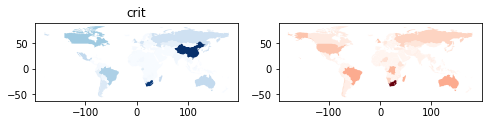

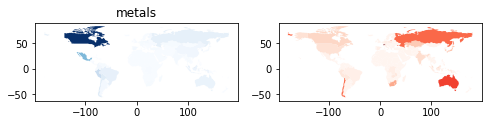

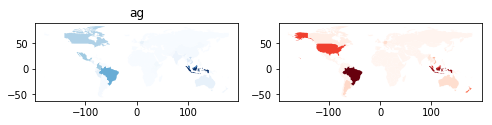

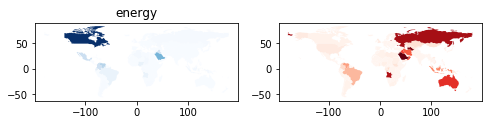

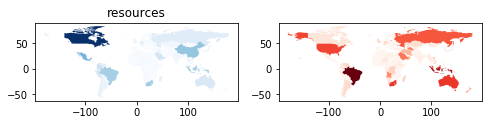

In [10]:
maps('crit', dat=out)
maps('crit', dat=out2)
maps('metals', dat=out)
maps('metals', dat=out2)
maps('ag', dat=out)
maps('ag', dat=out2)
maps('energy', dat=out)
maps('energy', dat=out2)
maps('resources', dat=out)
maps('resources', dat=out2)

In [11]:
out.to_csv('scored_values.csv')

resources
country
Canada          1.000000
Mexico          0.472097
China           0.395249
South Africa    0.370866
Indonesia       0.360317
Brazil          0.349674
Malaysia        0.330929
Colombia        0.212064
Saudi Arabia    0.180229
Peru            0.149616
Name: resources_us, dtype: float64
country
Brazil                      0.540594
Indonesia                   0.452799
South Africa                0.350323
Australia                   0.345209
United States of America    0.325857
Malaysia                    0.316550
Russia                      0.299281
Saudi Arabia                0.250059
Turkmenistan                0.236615
Angola                      0.209727
Name: resources_cn, dtype: float64




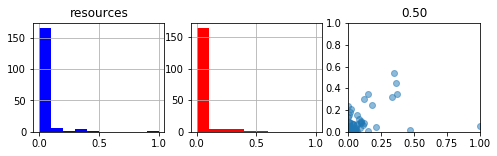

In [12]:
tops('resources', dat=out)
plots('resources', dat=out)


In [13]:
usi = 'mil_ex_us'
cni = 'mil_ex_cn'
np.nanpercentile(np.vstack((dat[usi], dat[cni])), 100-2.5)


38.0